# Business Case: Marketing Strategy vs. Sales Performance (CCA)

In this notebook, we use **Canonical Correlation Analysis (CCA)** to understand the relationship between **Marketing Investments** and **Business Outcomes**.

**The Business Question:**
"How do different combinations of marketing spend (TV, Social, Email) drive different types of sales performance (In-Store, Online, Retention)?"

We will generate a synthetic dataset to simulate a realistic scenario where:
1.  **Digital Marketing** (Social + Email) drives **Online Sales** and **Retention**.
2.  **Traditional Marketing** (TV) drives **In-Store Sales**.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import CCA

# Set plot style
sns.set(style="whitegrid")

### 2. Generate Synthetic Business Data
We will create a dataset with 200 samples (e.g., weekly data for multiple regions).

In [2]:
np.random.seed(42)
n_samples = 200

# --- Latent Variables (The "Hidden" Strategies) ---
# Strategy 1: Digital Push (High Social/Email -> High Online/Retention)
digital_strategy = np.random.normal(0, 1, n_samples)

# Strategy 2: Brand Awareness (High TV -> High In-Store)
brand_strategy = np.random.normal(0, 1, n_samples)

# --- Marketing Investments (Set X) ---
# TV Spend is driven by Brand Strategy
tv_spend = 5000 + 1000 * brand_strategy + np.random.normal(0, 200, n_samples)

# Social Media Spend is driven by Digital Strategy
social_spend = 3000 + 800 * digital_strategy + np.random.normal(0, 150, n_samples)

# Email Spend is driven by Digital Strategy
email_spend = 1000 + 300 * digital_strategy + np.random.normal(0, 50, n_samples)

# --- Business Outcomes (Set Y) ---
# In-Store Sales driven by Brand Strategy (TV)
in_store_sales = 20000 + 5000 * brand_strategy + np.random.normal(0, 1000, n_samples)

# Online Sales driven by Digital Strategy (Social)
online_sales = 15000 + 4000 * digital_strategy + np.random.normal(0, 800, n_samples)

# Retention driven by Digital Strategy (Email)
retention_rate = 0.60 + 0.10 * digital_strategy + np.random.normal(0, 0.02, n_samples)

# Create DataFrames
X = pd.DataFrame({
    'TV_Spend': tv_spend,
    'Social_Media': social_spend,
    'Email_Spend': email_spend
})

Y = pd.DataFrame({
    'In_Store_Sales': in_store_sales,
    'Online_Sales': online_sales,
    'Retention_Rate': retention_rate
})

print("Marketing Investments (X) - Head:")
print(X.head())
print("\nBusiness Outcomes (Y) - Head:")
print(Y.head())

Marketing Investments (X) - Head:
      TV_Spend  Social_Media  Email_Spend
0  5038.901829   3510.919615  1195.928436
1  5440.909522   2751.063760   932.718473
2  6084.099983   3648.591718  1199.112600
3  6063.198171   4421.769564  1433.795192
4  3532.317538   2874.692536   908.029176

Business Outcomes (Y) - Head:
   In_Store_Sales  Online_Sales  Retention_Rate
0    23188.292238  17087.036214        0.628733
1    23728.556315  14103.418362        0.596907
2    25474.886586  17688.592155        0.688483
3    24622.073482  21526.757849        0.766682
4    13809.876474  14102.474557        0.596506


### 3. Perform CCA
We fit the CCA model to find the correlations.

In [3]:
# Initialize CCA with 2 components (we expect 2 main strategies)
cca = CCA(n_components=2)
cca.fit(X, Y)

# Transform
X_c, Y_c = cca.transform(X, Y)

# Calculate Correlations
cc_res = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
print("Canonical Correlations:", cc_res)

Canonical Correlations: [0.9805262966593443, 0.9572843097849086]


### 4. Interpret the Weights (Loadings)
This is the most important part for business insight. We look at which variables have high weights in each canonical variate.

In [4]:
# Helper function to display weights nicely
def get_weights_df(weights, columns, name):
    df = pd.DataFrame(weights, index=columns, columns=['Variate 1', 'Variate 2'])
    df['Abs_Variate_1'] = df['Variate 1'].abs()
    df['Abs_Variate_2'] = df['Variate 2'].abs()
    return df

x_weights_df = get_weights_df(cca.x_weights_, X.columns, "Marketing")
y_weights_df = get_weights_df(cca.y_weights_, Y.columns, "Sales")

print("--- Marketing Weights (X) ---")
print(x_weights_df[['Variate 1', 'Variate 2']])

print("\n--- Sales/Outcome Weights (Y) ---")
print(y_weights_df[['Variate 1', 'Variate 2']])

--- Marketing Weights (X) ---
              Variate 1  Variate 2
TV_Spend       0.136455   0.977973
Social_Media   0.514473  -0.206212
Email_Spend    0.846580  -0.032317

--- Sales/Outcome Weights (Y) ---
                Variate 1  Variate 2
In_Store_Sales   0.098789   0.983413
Online_Sales     0.717748   0.035464
Retention_Rate   0.689259  -0.177878


### 5. Visualization
Visualizing the separation of strategies.

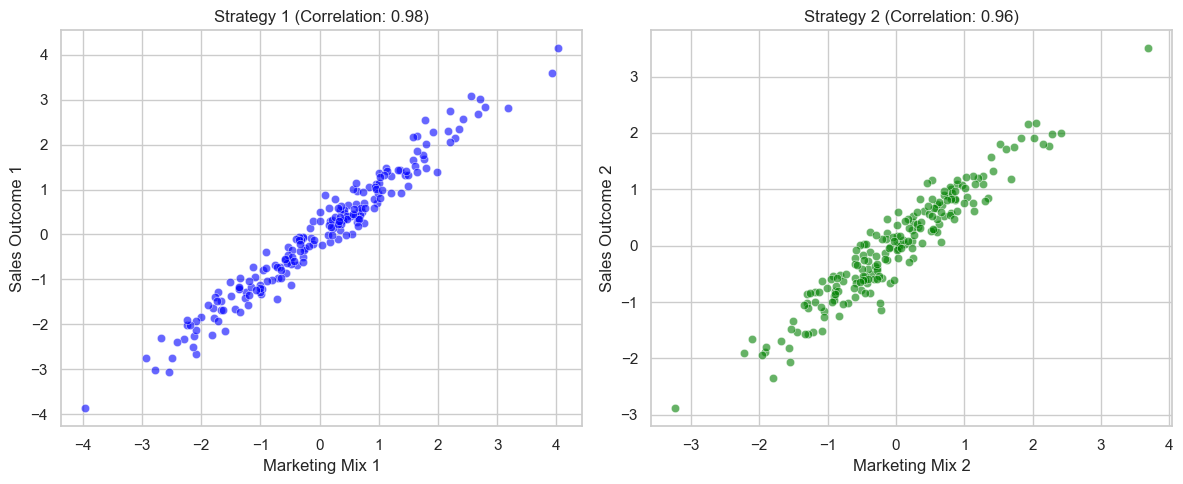

In [5]:
plt.figure(figsize=(12, 5))

# Plot Variate 1
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], color='blue', alpha=0.6)
plt.title(f'Strategy 1 (Correlation: {cc_res[0]:.2f})')
plt.xlabel('Marketing Mix 1')
plt.ylabel('Sales Outcome 1')

# Plot Variate 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_c[:, 1], y=Y_c[:, 1], color='green', alpha=0.6)
plt.title(f'Strategy 2 (Correlation: {cc_res[1]:.2f})')
plt.xlabel('Marketing Mix 2')
plt.ylabel('Sales Outcome 2')

plt.tight_layout()
plt.show()

### 6. Business Interpretation

**Canonical Variate 1 (The Primary Driver):**
*   **Marketing Side:** Look at the weights for `TV_Spend` vs `Social_Media`/`Email`. If `Social` and `Email` are high, this represents a **"Digital-First Strategy"**.
*   **Outcome Side:** Look at `Online_Sales` and `Retention`. If these are high, it confirms that the Digital Strategy is driving these specific outcomes.

**Canonical Variate 2 (The Secondary Driver):**
*   **Marketing Side:** Look for high `TV_Spend` weights.
*   **Outcome Side:** Look for high `In_Store_Sales` weights.
*   **Insight:** This isolates the **"Brand Awareness Strategy"**, showing that while digital drives online, TV is still the key driver for physical retail footfall.

**Conclusion:**
CCA allows us to disentangle these mixed effects. Instead of just saying "Marketing drives Sales", we can say:
> "We have two distinct mechanisms at play: A digital engine that drives e-commerce and loyalty, and a broadcast engine that maintains our brick-and-mortar presence."